In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')

In [2]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 10000*5

# stocks_list = ['GHCL.NS','HDFCBANK.NS','TATAMOTORS.NS','NH.NS','EMAMILTD.NS']
# stocks_list = ['CANBK.NS','NHPC.NS','TATASTEEL.NS','WIPRO.NS']
stocks_list = ['YESBANK.NS','GRASIM.NS','JSWENERGY.NS','CIPLA.NS','TCS.NS','EMAMILTD.NS']
start_date = "2021-04-04"
end_date = "2024-04-04"

In [3]:
# GATHERING STOCK DATA

stock_data = {}

for stock in stocks_list:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date, )['Close']
    
stock_prices = pd.DataFrame(stock_data)

stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553627,804.783813,3050.480469,473.761536
2021-04-06 00:00:00+05:30,15.600000,1410.909424,83.674393,820.884399,3074.779541,480.890076
2021-04-07 00:00:00+05:30,15.600000,1415.686401,87.337898,825.498535,3081.089844,482.173187
2021-04-08 00:00:00+05:30,15.550000,1425.929077,86.605186,826.627563,3124.367188,490.822479
2021-04-09 00:00:00+05:30,15.450000,1418.246826,98.133011,866.928040,3128.982666,491.202637
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3840.899902,437.750000
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3876.300049,429.350006
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3916.750000,439.850006


In [4]:
# CALCULATING LOGARITHMIC RETURNS

NUM_TRADING_DAYS = 251*3

returns_df = stock_prices.copy().reset_index().drop(columns=['Date'])
a = np.array(returns_df).T
log_returns = pd.DataFrame(np.log((a[:,1:] / a[:,:-1]).T), columns=stock_prices.columns, index=stock_prices.index[1:])
log_returns

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-06 00:00:00+05:30,0.006431,-0.009691,-0.010453,0.019809,0.007934,0.014935
2021-04-07 00:00:00+05:30,0.000000,0.003380,0.042851,0.005605,0.002050,0.002665
2021-04-08 00:00:00+05:30,-0.003210,0.007209,-0.008425,0.001367,0.013948,0.017779
2021-04-09 00:00:00+05:30,-0.006452,-0.005402,0.124964,0.047602,0.001476,0.000774
2021-04-12 00:00:00+05:30,-0.066915,-0.045026,-0.078136,0.021676,-0.023049,-0.021317
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,-0.017131,-0.014705,0.006700,-0.006064,-0.009484,0.005727
2024-03-28 00:00:00+05:30,0.002158,0.035579,0.023434,0.022701,0.009174,-0.019376
2024-04-01 00:00:00+05:30,0.052478,0.002293,-0.019956,0.001135,0.010381,0.024161


In [5]:
# CALCULATING AVERAGE ANNUAL RETURNS

log_returns.mean()*NUM_TRADING_DAYS

YESBANK.NS      0.501908
GRASIM.NS       0.489146
JSWENERGY.NS    1.959189
CIPLA.NS        0.613237
TCS.NS          0.261907
EMAMILTD.NS    -0.079060
dtype: float64

In [6]:
# CALCULATING ANNUAL VOLATILITY

log_returns.std()/np.sqrt(NUM_TRADING_DAYS)

YESBANK.NS      0.000968
GRASIM.NS       0.000553
JSWENERGY.NS    0.001085
CIPLA.NS        0.000532
TCS.NS          0.000476
EMAMILTD.NS     0.000636
dtype: float64

In [7]:
# GENRATING RANDOM WEIGHTS AND CALCULATING THE RETURN & THE RISKS ASSOCIATED WITH THEM

portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

for i in range(NUM_SIMULATIONS):
    
    # generating random weights
    w = np.random.rand(log_returns.shape[1])
    w /= np.sum(w)
    portfolio_weights.append(w)
    
    # calculating returns
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    
    # calculating risks
    port_risks = np.sqrt(np.dot(w.T, np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risks)

In [8]:
# taking IR of government issued 10-year bonds as risk-free rate
risk_free_rate = 0.07

In [24]:
# CREATING DATAFRAME FOR WEIGHTS, RETURNS, RISKS, SHARPE

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

portfolios = pd.DataFrame({"Return":portfolio_returns, "Risk":portfolio_risks, "Sharpe":sharpe_ratios})

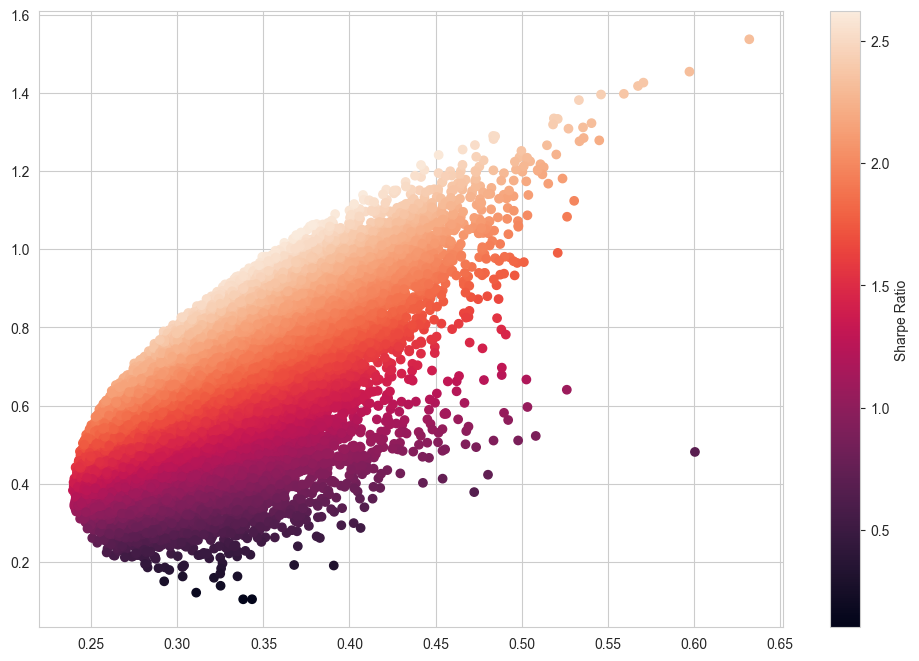

In [25]:
# PLOTTING RISK VS RETURN SCATTERPLOT


plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("expected Return")
plt.colorbar(label="Sharpe Ratio")

plt.show()

In [150]:
# FINDING OUT THE MAXIMUM SHARPE RATIO

ind = np.argmax(sharpe_ratios)

print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  3.0941048487501366
Corresponding Return =   1.513808212318181
Corresponding Risk =   0.46663196074347874


In [151]:
# CORRESPONDING WEIGHTS FOR OUR PORTFOLIO WITH MAX SHARPE

for i in range(len(stocks_list)):
    print(stocks_list[i] ," : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.008497258080604359
GRASIM.NS  :  0.03864852551726743
JSWENERGY.NS  :  0.4082129507240686
CIPLA.NS  :  0.48987130961647
TCS.NS  :  0.04793231112192752
EMAMILTD.NS  :  0.006837644939661951


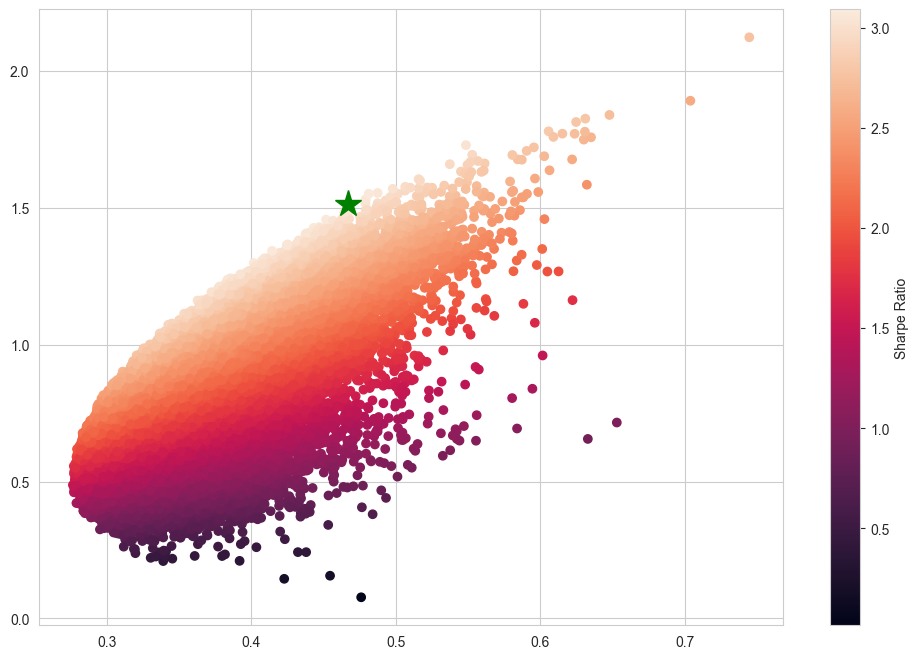

In [153]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label='Sharpe Ratio')

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)

In [154]:
# FINDING OUT THE MINIMUM SHARPE RATIO

ind = np.argmin(sharpe_ratios)

print("Minimum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Minimum Sharpe Ratio =  0.015705372676990362
Corresponding Return =   0.07747579623303864
Corresponding Risk =   0.47600247296208903


In [155]:
# CORRESPONDING WEIGHTS FOR OUR PORTFOLIO WITH MIN SHARPE

for i in range(len(stocks_list)):
    print(stocks_list[i] ," : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.01586518419421929
GRASIM.NS  :  0.007787132170973507
JSWENERGY.NS  :  0.025175296775313424
CIPLA.NS  :  0.09247385480467743
TCS.NS  :  0.024027327314803865
EMAMILTD.NS  :  0.8346712047400124


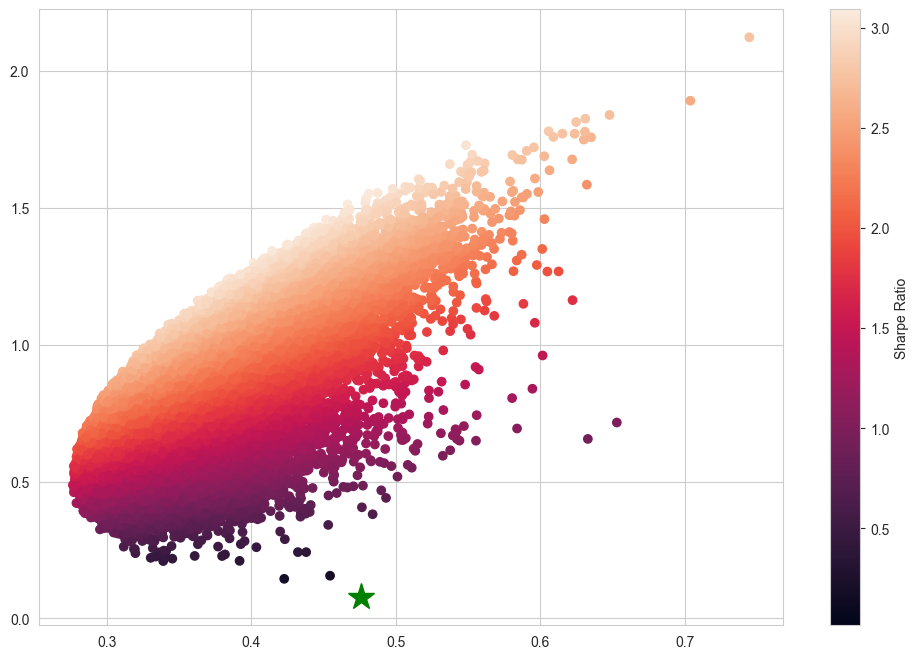

In [156]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns, c = sharpe_ratios, marker='o')
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label='Sharpe Ratio')

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize=20.0)

In [125]:
portfolio_weights.shape

(50000, 6)

In [126]:
stock_prices.shape

(742, 6)

In [166]:
ind = np.argmax(sharpe_ratios)
initial_investment = 10000
first_day_prices = np.array(stock_prices.iloc[0,:])
weights = portfolio_weights[ind]
individual_value_invested = weights*initial_investment

shares = individual_value_invested / first_day_prices

for i in range(shares.shape[0]):
    print("{}- values invested: {}, shares bought: {}".format(stocks_list[i],round(individual_value_invested[i],2),round(shares[i],2)))
          

YESBANK.NS- values invested: 84.97, shares bought: 5.48
GRASIM.NS- values invested: 386.49, shares bought: 0.27
JSWENERGY.NS- values invested: 4082.13, shares bought: 48.28
CIPLA.NS- values invested: 4898.71, shares bought: 6.09
TCS.NS- values invested: 479.32, shares bought: 0.16
EMAMILTD.NS- values invested: 68.38, shares bought: 0.14


In [129]:
df = stock_prices.copy()
df['Portfolio Value'] = np.sum(np.array(stock_prices)*shares,axis=1)

In [130]:
df

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS,Portfolio Value
Date,,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553635,804.783813,3050.480957,473.761536,10000.000000
2021-04-06 00:00:00+05:30,15.600000,1410.909424,83.674393,820.884399,3074.779785,480.890106,10125.646528
2021-04-07 00:00:00+05:30,15.600000,1415.686401,87.337898,825.498535,3081.090088,482.173187,10151.433171
2021-04-08 00:00:00+05:30,15.550000,1425.929077,86.605194,826.627563,3124.366943,490.822479,10310.794824
2021-04-09 00:00:00+05:30,15.450000,1418.246826,98.133011,866.928101,3128.982178,491.202637,10321.713890
...,...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3840.899902,437.750000,10594.060125
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3876.300049,429.350006,10511.992709
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3916.750000,439.850006,10735.152639


In [109]:
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-04-05 00:00:00+05:30,15.500000,1424.648804,84.553635,804.783813,3050.480957,473.761536
2021-04-06 00:00:00+05:30,15.600000,1410.909424,83.674393,820.884399,3074.779785,480.890106
2021-04-07 00:00:00+05:30,15.600000,1415.686401,87.337898,825.498535,3081.090088,482.173187
2021-04-08 00:00:00+05:30,15.550000,1425.929077,86.605194,826.627563,3124.366943,490.822479
2021-04-09 00:00:00+05:30,15.450000,1418.246826,98.133011,866.928101,3128.982178,491.202637
...,...,...,...,...,...,...
2024-03-27 00:00:00+05:30,23.150000,2207.350098,516.650024,1463.349976,3840.899902,437.750000
2024-03-28 00:00:00+05:30,23.200001,2287.300049,528.900024,1496.949951,3876.300049,429.350006
2024-04-01 00:00:00+05:30,24.450001,2292.550049,518.450012,1498.650024,3916.750000,439.850006
